**In this notebook we read a YouTube video and save frames that contain annoted pictures of bicycles**






Importing libraries




In [ ]:
#!pip install pafy
#!sudo pip install --upgrade youtube_dl


In [ ]:
import pafy
import cv2 
import matplotlib.pyplot as plt
import matplotlib.image as imgg
import matplotlib.patches as patches
import os
import pandas as pd
import numpy as np

from PIL import Image
from PIL import ImageDraw

Accessing the video

In [ ]:
url = 'https://www.youtube.com/watch?v=5AJlYeZ8Ilc&ab_channel=TopCyclingHD'
vPafy = pafy.new(url)
play = vPafy.getbest(preftype="mp4")



Importing the Google drive where we save the frames to

In [ ]:
from google.colab import drive 
drive.mount('/gdrive')
#%cd /gdrive

Mounted at /gdrive


Loading the annotation text from the same drive into a pandas dataframe

In [ ]:
annot = pd.read_csv('/gdrive/My Drive/giro1_1_TXT.txt_moving.txt', header = None)



Saving the column corresponding to the frame number into a list

In [ ]:
af = [None]*len(annot) 
for i in range(len(annot)):
   af[i] = int(annot.values[i][0].split(' ')[1]) 

We save the frames to this folder

In [ ]:
import os
os.chdir('/gdrive/My Drive/bicycle')


Saving the frames

In [ ]:
cap = cv2.VideoCapture(play.url) 
while (True and i <= 12500):
    ret,frame = cap.read()
    if ret == False:
        break
    if i in af:
        cv2.imwrite('giro1_'+str(i)+'.jpg', frame)
    i+=1
cap.release()
cv2.destroyAllWindows()

The classes distinguished in the annotation 

In [ ]:
class_={
    '1F': 'Front View',
    '1B': 'Back View',
    '1L': 'Left View',
    '1R': 'Right View',
    '2': ' Bicycle Crowd',
    '5H': 'High-Density Human Crowd',
    '5L': 'Low-Density Human Crowd',
    '0': 'irrelevant TV graphics'
}

saving the columns into variables

In [ ]:
frameN = [None]*len(annot)
ObjectID = [None]*len(annot)
x1 = [None]*len(annot)
y1 = [None]*len(annot)
x2 = [None]*len(annot)
y2 = [None]*len(annot)
ObjectType = [None]*len(annot)


In [ ]:
for i in range(len(annot)):
  frameN[i] = int(annot.values[i][0].split(' ')[1])
  ObjectID[i] = int(annot.values[i][0].split(' ')[2])
  x1[i] = int(annot.values[i][0].split(' ')[3])
  y1[i] = int(annot.values[i][0].split(' ')[4])
  x2[i] = int(annot.values[i][0].split(' ')[5])
  y2[i] = int(annot.values[i][0].split(' ')[6])
  ObjectType[i] = annot.values[i][0].split(' ')[8]


creating a dataframe that has the values separated into different columns

In [ ]:
annot_split = pd.DataFrame(columns = ["frame", "ID", "x1", "y1", "x2", "y2", "OT"]) #creating a new dataframe with values in seperate columns
annot_split["frame"] = frameN
annot_split["ID"] = ObjectID
annot_split["x1"] = x1
annot_split["y1"] = y1
annot_split["x2"] = x2
annot_split["y2"] = y2
annot_split["OT"] = ObjectType
annot_split.head()

,frame,ID,x1,y1,x2,y2,OT
0,215,1,538,503,608,705,1F
1,215,2,638,506,713,705,1F
2,215,3,742,508,810,708,1F
3,215,4,857,507,920,708,1F
4,215,5,967,509,1027,707,1F


Creating a funcion that reads the picture and draws boxes on it 

In [ ]:
def draw(image): #for every given image it reads the annotations and draws boxes according to them
  pic =  imgg.imread('/gdrive/My Drive/bicycle/giro1'+str(image)+'.jpg')
  fig,ax = plt.subplots(1)
  plt.imshow(pic)
  p = annot_split.query('frame == @image')
  x = (p.x1.values/1.5).astype(int) #saved frames and annotation have different sizes (original video source is 1.5x larger in both dimensions)
  y = (p.y1.values/1.5).astype(int)
  x_ = (p.x2.values/1.5).astype(int)
  y_ = (p.y2.values/1.5).astype(int)

  rect = []
  for i in range(len(p)):
    rect.append(patches.Rectangle((x[i],y[i]),x_[i]-x[i],  y_[i]-y[i], linewidth=1,edgecolor='r',facecolor='none'))

  for r in rect:
          ax.add_patch(r)

These are some examples 

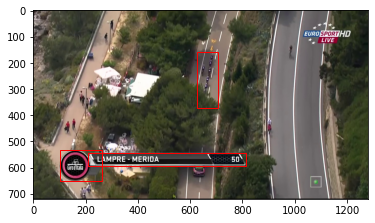

In [ ]:
draw(1670)

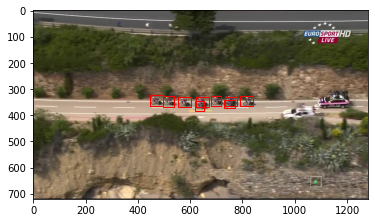

In [ ]:
draw(5039)

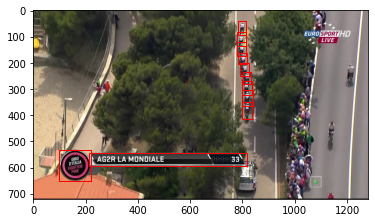

In [ ]:
draw(8751)

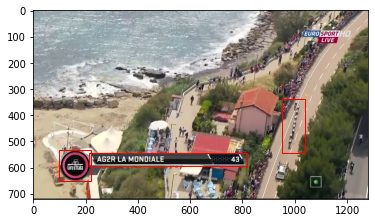

In [ ]:
draw(9000)

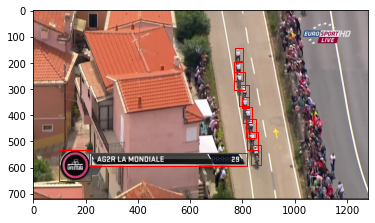

In [ ]:
draw(8648)

This section is not part of our project yet and is to be tested

In [ ]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir('/content/drive/My Drive/bicycle') if isfile(join('/content/drive/My Drive/bicycle', f))]

for element in onlyfiles:
  new_set = {element.replace('.jpg', '').replace('giro1', '') for element in onlyfiles}
files = list(new_set)

A = annot_split.frame.values
b = annot_split.frame.unique()
for value in b:
  if not value in files:
    B = A == value
    annot_split.drop(B , inplace=True)